In [10]:
import enzope as ezp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n_agents = 1000
n_models = 10
theta = 1000

In [12]:
gtgs = [ezp.GTG(n_nodes=n_agents, theta=theta, plotable=False) for i in range(n_models)]
connectivity = np.mean([gtg.get_mean_connectivity() for gtg in gtgs])
error = np.std([gtg.get_mean_connectivity() for gtg in gtgs])
print(f"Mean connectivity of {n_models} graphs: {connectivity:.2f} +- {error:.2f}")

Mean connectivity of 10 graphs: 6.04 +- 0.19


In [14]:
models = [
    ezp.CPUModel(n_agents=n_agents, f=0.2, w_min=1e-14, G=gtgs[i], measure_every=1)
    for i in range(n_models)
]

In [15]:
for i in range(n_models):
    models[i].MCS(steps=20000)

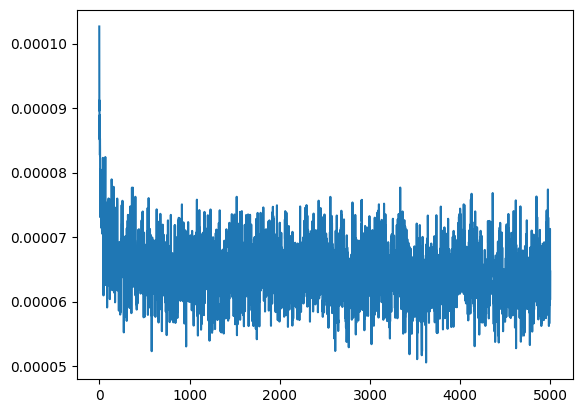

In [46]:
t = np.arange(20000)
liquidity = np.mean([model.liquidity for model in models])
error_liq = np.std([model.liquidity for model in models])
plt.errorbar(t, liquidity, error_liq)

In [7]:
t = np.arange(20000)
n_active = np.mean([model.n_active for model in models])
error_act = np.std([model.n_active for model in models])
plt.errorbar(t, n_active, error_act)

0.483